# **Teams06 - Análise de Dados Para Previsão de Doenças**

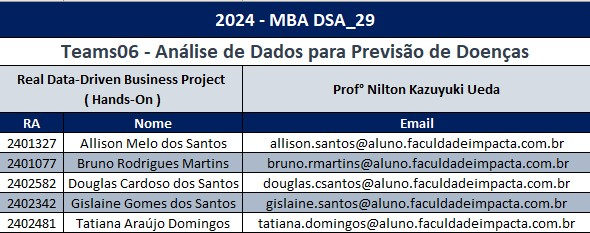

# **Etapas e desenvolvimento Projeto**

**Dicionário**

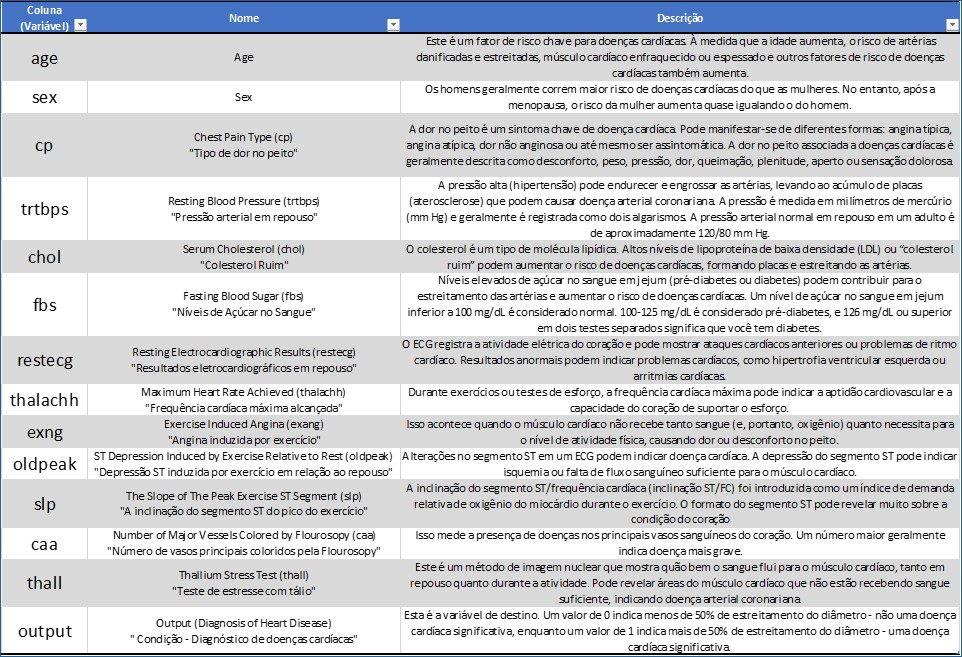

# **Carregar Bibliotecas para Trabalho e Base de Dados**

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

In [4]:
#Criação da plot_confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusão',
                          cmap=plt.cm.Blues):
    """
    Função para imprimir e plotar a matriz de confusão.
    A normalização pode ser aplicada configurando `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão Normalizada")
    else:
        print('Matriz de Confusão, sem normalização')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Previsto')


In [5]:
# Carregar o dataset
url = "https://raw.githubusercontent.com/Piggk2/RealData_DSA/refs/heads/main/heart.csv"
df = pd.read_csv(url)

In [6]:
#Vizualização do arquivo
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#Descrição estatísticas
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Tratamento dos Dados**

In [8]:
# Verificar Duplicados
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 14)


In [9]:
#Remover Duplicados#
df = df.drop_duplicates()

In [10]:
# Verificar duplicados após tratamento
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 14)


In [11]:
#Ver se possui valores Vazios
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


# **Análises Iniciais**

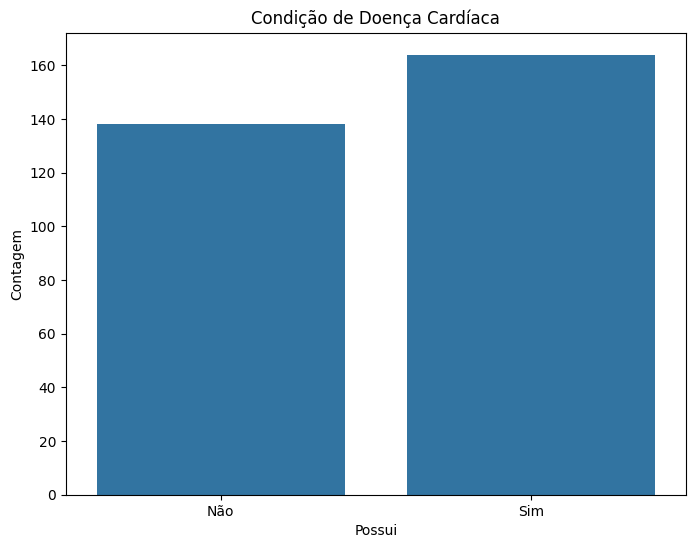

In [12]:
#Distruibição Variável alvo para doenças cardíaca.
plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=df)
plt.title('Condição de Doença Cardíaca')
plt.xlabel('Possui')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()


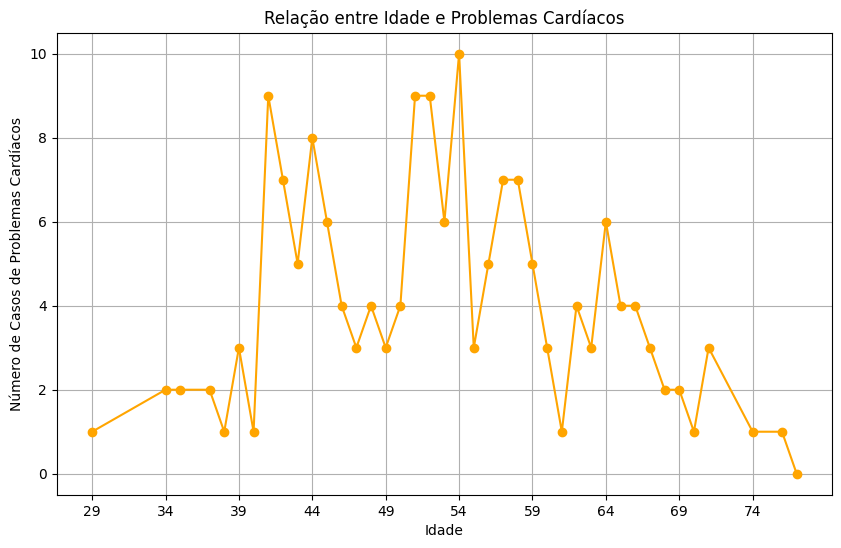

In [13]:
# Contar o número de problemas cardíacos por faixa etária
idade_problema_cardiaco = df.groupby('age')['output'].sum()

# Gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(idade_problema_cardiaco.index, idade_problema_cardiaco.values, marker='o', color='orange')
plt.title('Relação entre Idade e Problemas Cardíacos')
plt.xlabel('Idade')
plt.ylabel('Número de Casos de Problemas Cardíacos')
plt.grid()
plt.xticks(range(min(df['age']), max(df['age']) + 1, 5))  # Ajustar os ticks no eixo x
plt.show()

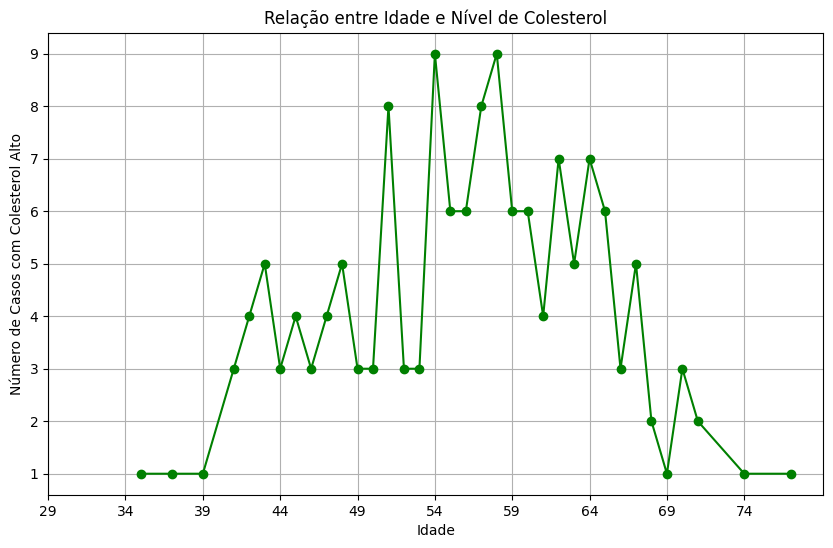

In [14]:
# Filtrar o DataFrame para incluir apenas os casos com colesterol alto
colesterol_alto = df[df['chol'] > 240]

# Contar o número de casos com colesterol alto por idade
idade_colesterol_alto = colesterol_alto.groupby('age').size()

# Gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(idade_colesterol_alto.index, idade_colesterol_alto.values, marker='o', color='green')
plt.title('Relação entre Idade e Nível de Colesterol')
plt.xlabel('Idade')
plt.ylabel('Número de Casos com Colesterol Alto')
plt.grid()
plt.xticks(range(min(df['age']), max(df['age']) + 1, 5))  # Ajustar os ticks no eixo x
plt.show()


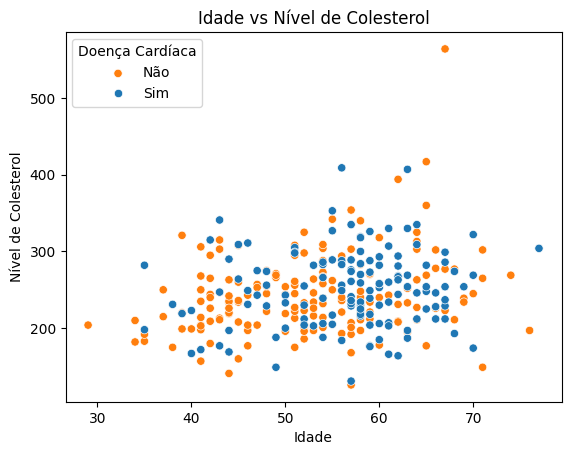

In [15]:
sns.scatterplot(x='age', y='chol', hue='output', data=df)
plt.title('Idade vs Nível de Colesterol')
plt.xlabel('Idade')
plt.ylabel('Nível de Colesterol')
plt.legend(title='Doença Cardíaca', labels=['Não', 'Sim'])
plt.show()


# **Criação dos Modelos**

In [16]:
#Selecionando as colunas para modelo
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']

In [17]:
#Criar os eixos
X = df.drop('output', axis=1)
y = df['output']

In [18]:
# Criar a base teste e treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defini o processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# Ajustar treino e teste
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [19]:
#Para avaliar os modelos
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    return train_acc, test_acc, test_preds

In [20]:
#Definir o plot dos modelos e matriz de confusão
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# **Model Comparision**

In [21]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    ]

In [22]:
model_names = ["Logistic Regression", "Decision Trees", "Random Forest",]

In [23]:
train_results = []
test_results = []

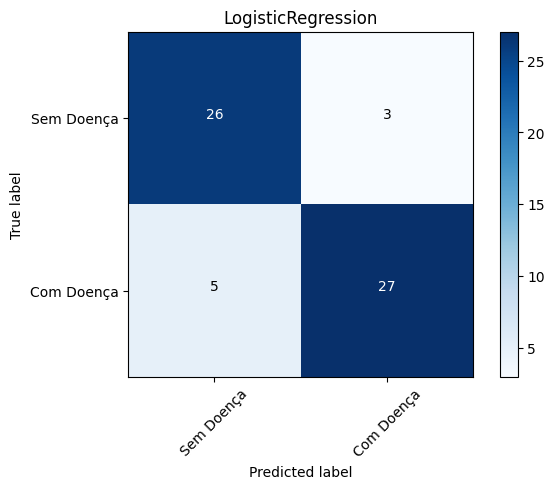

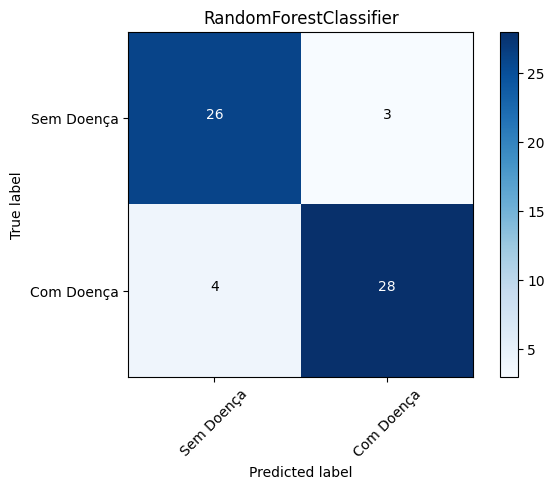

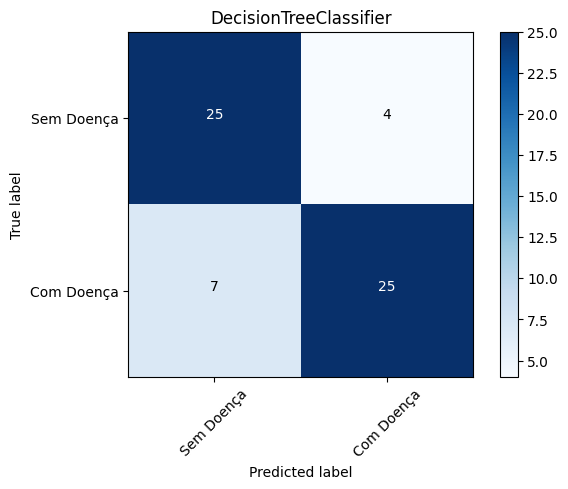

In [24]:
for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    train_results.append(train_acc)
    test_results.append(test_acc)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['Sem Doença', 'Com Doença'], title=model.__class__.__name__)
    plt.show()

In [25]:
# prompt: gerar o relatorio de classificacao dos modelos acima usando a classification_report

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model.__class__.__name__}:\n")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")


Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


--------------------------------------------------

Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


--------------------------------------------------

Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       0.83      0.83   

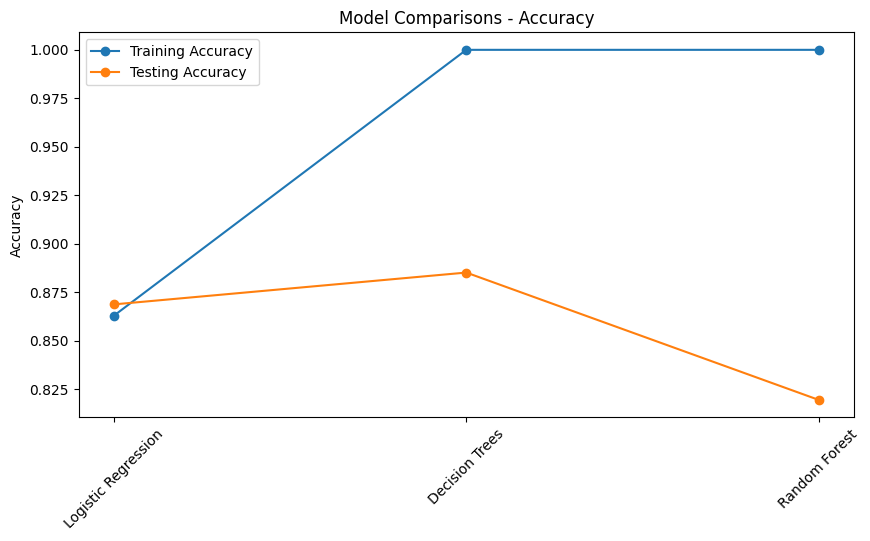

In [26]:
# plot model performance
plt.figure(figsize=(10,5))
plt.plot(model_names, train_results, 'o-', label="Training Accuracy")
plt.plot(model_names, test_results, 'o-', label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.show()

##FIM##